# ZarrDataset usage example

Import the "zarrdataset" package

In [1]:
import zarrdataset as zds
import zarr

Load data stored on S3 storage

In [2]:
# These are images from the Image Data Resource (IDR) 
# https://idr.openmicroscopy.org/ that are publicly available and were 
# converted to the OME-NGFF (Zarr) format by the OME group. More examples
# can be found at Public OME-Zarr data (Nov. 2020)
# https://www.openmicroscopy.org/2020/11/04/zarr-data.html

filenames = ["https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0073A/9798462.zarr"]

Inspect the image to sample

In [3]:
z_img = zarr.open(filenames[0], mode="r")
z_img["0"].info

Name,/0
Type,zarr.core.Array
Data type,uint8
Shape,"(1, 3, 1, 16433, 21115)"
Chunk shape,"(1, 1, 1, 1024, 1024)"
Order,C
Read-only,True
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.FSStore
No. bytes,1040948385 (992.7M)
Chunks initialized,0/1071


Display a downsampled version of the image

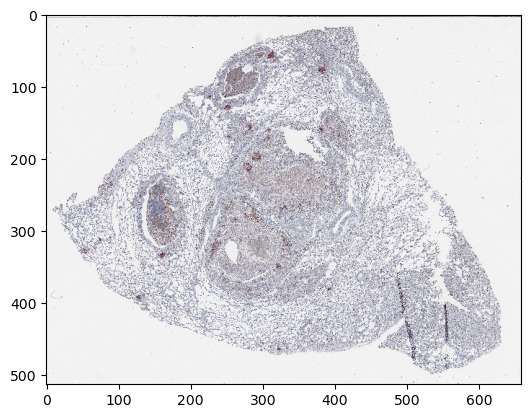

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.moveaxis(z_img["5"][0, :, 0], 0, -1))
plt.show()

### Extracting patches of size 512x512 pixels from a Whole Slide Image (WSI)

Sample the image uniformly in a grid pattern

In [5]:
patch_size = dict(Y=512, X=512)
patch_sampler = zds.GridPatchSampler(patch_size=patch_size)

Create a dataset from the list of filenames. All those files should be stored within their respective group "0".

Also, specify that the axes order in the image is Time-Channel-Depth-Height-Width (TCZYX), so the data can be handled correctly

In [6]:
my_dataset = zds.ZarrDataset(filenames,
                             data_group="0",
                             source_axes="TCZYX",
                             patch_sampler=patch_sampler,
                             return_any_label=False)

Create a generator from the dataset object

In [7]:
ds_iterator = iter(my_dataset)
ds_iterator

<generator object ZarrDataset.__iter__ at 0x0000027E733EF9A8>

Extract a sample from the image using the generator

In [8]:
sample = next(ds_iterator)
type(sample), sample.shape, sample.dtype

(numpy.ndarray, (1, 3, 1, 512, 512), dtype('uint8'))

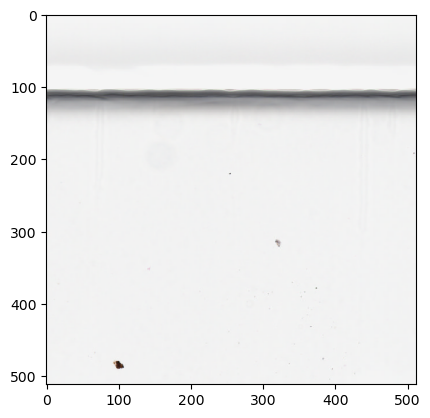

In [9]:
plt.imshow(np.moveaxis(sample[0, :, 0], 0, -1))
plt.show()

Try now with sampling patches from random locations

In [10]:
my_dataset = zds.ZarrDataset(filenames,
                             data_group="0",
                             source_axes="TCZYX",
                             patch_sampler=patch_sampler,
                             return_any_label=False,
                             shuffle=True)

In [11]:
ds_iterator = iter(my_dataset)

In [12]:
sample = next(ds_iterator)

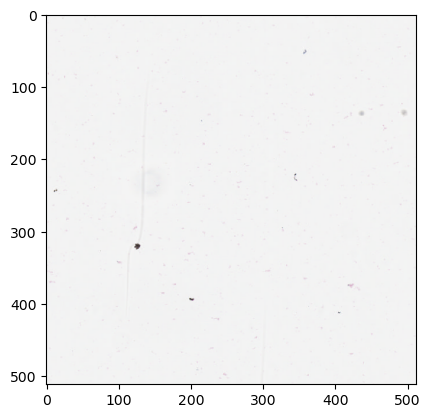

In [13]:
plt.imshow(np.moveaxis(sample[0, :, 0], 0, -1))
plt.show()

ZarrDataset objects can be used as generators in for loops

In [14]:
samples = []
for i, sample in enumerate(my_dataset):
    samples.append(np.moveaxis(sample[0, :, 0], 0, -1))

    if i > 5:
        # Take only five samples for illustration purposes
        break

samples = np.hstack(samples)

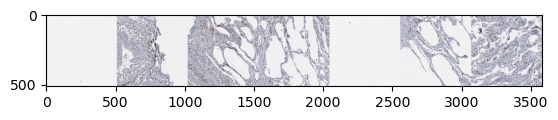

In [15]:
plt.imshow(samples)
plt.show()